In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr

In [2]:
carbon_data = nc.Dataset("dataset_satellite_data_carbon_dioxide.nc", 'r')


In [3]:
global_attributes = carbon_data.ncattrs()
print(global_attributes)

['activity_id', 'comment', 'contact', 'Conventions', 'creation_date', 'data_specs_version', 'frequency', 'further_info_url', 'grid', 'grid_label', 'institution', 'institute_id', 'license', 'nominal_resolution', 'product', 'realm', 'references', 'region', 'source', 'source_id', 'source_label', 'source_type', 'source_version_number', 'title', 'tracking_id', 'variable_id', 'variant_info', 'variant_label']


In [4]:
print(carbon_data.title)

C3S XCO2 v4.4


In [5]:
carbon_data = nc.Dataset("dataset_satellite_data_carbon_dioxide.nc", 'r')

# Print variable names and their attributes
for var_name in carbon_data.variables:
    print(f"Variable: {var_name}")
    print("Attributes:")
    for attr_name in carbon_data.variables[var_name].ncattrs():
        print(f"  {attr_name}: {getattr(carbon_data.variables[var_name], attr_name)}")
    print()


Variable: time
Attributes:
  standard_name: time
  long_name: time
  units: days since 1990-01-01
  calendar: standard
  axis: T
  comment: time center

Variable: time_bnds
Attributes:
  units: days since 1990-01-01
  comment: time boundaries

Variable: lat
Attributes:
  standard_name: latitude
  long_name: latitude
  units: degrees_north
  axis: Y
  comment: latitude center

Variable: lat_bnds
Attributes:
  units: degrees_north
  comment: latitude boundaries

Variable: lon
Attributes:
  standard_name: longitude
  long_name: longitude
  units: degrees_east
  axis: X
  comment: longitude center

Variable: lon_bnds
Attributes:
  units: degrees_east
  comment: longitude boundaries

Variable: pre
Attributes:
  standard_name: pressure
  long_name: pressure
  units: surface_pressure
  axis: Z
  comment: pressure center

Variable: pre_bnds
Attributes:
  units: surface_pressure
  comment: pressure boundaries

Variable: land_fraction
Attributes:
  standard_name: land_area_fraction
  long_name: 

In [6]:
# carbon_data

In [7]:
carbon_data['lat']

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    comment: latitude center
unlimited dimensions: 
current shape = (36,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [8]:
carbon_test = xr.open_dataset("dataset_satellite_data_carbon_dioxide.nc")

In [9]:
import cartopy.crs as ccrs
import ipywidgets as widgets
from IPython.display import display
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [10]:
#help(carbon_test.xco2)
#help(carbon_test.xco2.sel)
#help(sliced_data)
#help(slice)

In [11]:
import nc_time_axis
import cartopy.feature as cfeature

In [12]:
states = cfeature.NaturalEarthFeature(category = 'cultural', 
                                     name= 'admin_1_states_provinces_lines',
                                     scale= '50m',
                                     facecolor = 'none')


In [13]:
#help(ax)

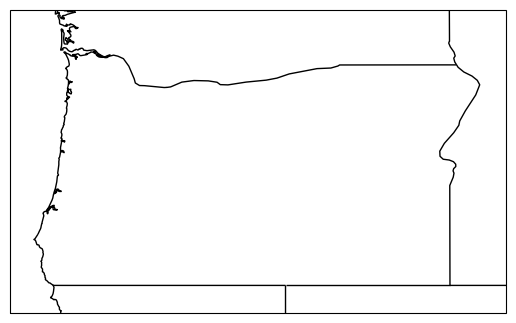

In [14]:
# Approximate boundaries of Oregon's border

min_longitude = -125
max_longitude = -116
min_latitude = 41.5
max_latitude = 47

# Creates slice of carbon data to visualize within Oregon
sliced_data = carbon_test.xco2[10,:,:].sel(lat=slice(min_latitude, max_latitude), 
                                                          lon=slice(min_longitude, max_longitude)) 
# Creates an axis with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Adds state boundary information to the axis
ax.add_feature(states, edgecolor='black')

# Adds coastlines to the axis
ax.coastlines()

# Sets the extent of the axis to the specified longitude and latitude range
ax.set_extent((min_longitude, max_longitude, 
               min_latitude, max_latitude), crs=ccrs.PlateCarree())



In [15]:
def plot_co2(time_index):
    
    """
    Plots CO2 levels at the specified time index using a PlateCarree projection map.
    
    Args:
        time_index (int): The time index of the CO2 data to be plotted.
        
    Returns:
        None
    """
    
    
    # Create a new figure
    fig = plt.figure(figsize=(12,6))
    
    # Create an axis with the PlateCarree projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Set the extent of the plot to cover the entire globe
    ax.set_extent((min_longitude, max_longitude, 
               min_latitude, max_latitude), crs=ccrs.PlateCarree())

    ax.add_feature(states, edgecolor='black')
    # Add coastlines to the plot
    ax.coastlines()

    # Plot the CO2 data with appropriate latitude and longitude coordinates
    img = ax.pcolormesh(carbon_test.lon, carbon_test.lat,
                        carbon_test.xco2[time_index,:,:], 
                        cmap='viridis', transform=ccrs.PlateCarree())

    # Add gridlines and labels for latitude and longitude
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha= 1.0 )
    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Add colorbar and labels
    plt.colorbar(img, label='CO2 levels', 
                 orientation='vertical',location = 'left', pad=0.05)
    plt.title(f'Time index: {time_index}')
    
    plt.show()




In [16]:
# Create integer slider widget to select a time index
slider = widgets.IntSlider(min=0, max=len(carbon_test.xco2)-1, 
                           step=1, value=0, description='Time index')

# Use the interact function to link the time index slider with the plot_co2 function
widgets.interact(plot_co2, time_index=slider)


interactive(children=(IntSlider(value=0, description='Time index', max=227), Output()), _dom_classes=('widget-…

<function __main__.plot_co2(time_index)>

#### AQI Daily Oregon

In [17]:
# read in AQI data 
dailyAQI_1990 = pd.read_csv("daily summary aqi_1990.csv")

In [18]:
# Filter the daily AQI data to only include data for Oregon
AQI = dailyAQI_1990[dailyAQI_1990["State Name"] == "Oregon"][["AQI", "Latitude", "Longitude"]]
AQI

,AQI,Latitude,Longitude
88352,33,45.496641,-122.602877
88353,61,45.496641,-122.602877
88354,42,45.496641,-122.602877
88355,14,45.496641,-122.602877
88356,20,45.496641,-122.602877
...,...,...,...
88412,55,45.496641,-122.602877
88413,41,45.496641,-122.602877
88414,34,45.496641,-122.602877
88415,57,45.496641,-122.602877


In [19]:
# vmin = AQI["AQI"].min()
# vmax = AQI["AQI"].max()


In [20]:
# Reshape the DataFrame so that each time index has its own column
AQI_reshaped = AQI.pivot_table(index=["Latitude", "Longitude"], columns=AQI.groupby(["Latitude", "Longitude"]).cumcount(), values="AQI")
AQI_reshaped.reset_index(inplace= True)

In [21]:
import geopandas as gpd
from shapely import wkt

In [22]:

# update AQI data to be specific to county 

AQI_counties_csv = pd.read_csv("daily_aqi_by_county_2022.csv")
print(AQI_counties_csv.head())

  State Name county Name  State Code  County Code        Date  AQI Category  \
0    Alabama     Baldwin           1            3  2022-01-02   22     Good   
1    Alabama     Baldwin           1            3  2022-01-05   36     Good   
2    Alabama     Baldwin           1            3  2022-01-08   35     Good   
3    Alabama     Baldwin           1            3  2022-01-11   15     Good   
4    Alabama     Baldwin           1            3  2022-01-14   48     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1  


In [23]:

# read in shapefile for oregon county geometries

shapefile_path = "tl_2022_41_cousub.shp"
counties_geometries = gpd.read_file(shapefile_path)
import us

from uszipcode import SearchEngine

C:\Users\dylan\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [24]:
print(counties_geometries.head())

  STATEFP COUNTYFP COUSUBFP  COUSUBNS       GEOID                    NAME  \
0      41      055    91989  01938065  4105591989                    Moro   
1      41      055    93434  01938150  4105593434                   Wasco   
2      41      067    90289  01937965  4106790289     Beaverton-Hillsboro   
3      41      067    91156  01938016  4106791156  Forest Grove-Cornelius   
4      41      067    92678  01938124  4106792678               Rockcreek   

                     NAMELSAD LSAD CLASSFP  MTFCC  CNECTAFP  NECTAFP  \
0                    Moro CCD   22      Z5  G4040       NaN      NaN   
1                   Wasco CCD   22      Z5  G4040       NaN      NaN   
2     Beaverton-Hillsboro CCD   22      Z5  G4040       NaN      NaN   
3  Forest Grove-Cornelius CCD   22      Z5  G4040       NaN      NaN   
4               Rockcreek CCD   22      Z5  G4040       NaN      NaN   

   NCTADVFP FUNCSTAT       ALAND    AWATER     INTPTLAT      INTPTLON  \
0       NaN        S  136564088

In [25]:
# Add a new column 'FIPS' to the AQI_counties_csv DataFrame by combining the values of 'State Code' and 'County Code'
# Convert 'State Code' and 'County Code' to string type and use the zfill() method to zero-pad them to 2 and 3 characters respectively
# Concatenate the zero-padded values of 'State Code' and 'County Code' and assign the result to the 'FIPS' column

AQI_counties_csv['FIPS'] = AQI_counties_csv['State Code'].astype(str).str.zfill(2) + AQI_counties_csv['County Code'].astype(str).str.zfill(3)


In [26]:
# Print updated dataframe
AQI_counties_csv


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,FIPS
0,Alabama,Baldwin,1,3,2022-01-02,22,Good,PM2.5,01-003-0010,1,01003
1,Alabama,Baldwin,1,3,2022-01-05,36,Good,PM2.5,01-003-0010,1,01003
2,Alabama,Baldwin,1,3,2022-01-08,35,Good,PM2.5,01-003-0010,1,01003
3,Alabama,Baldwin,1,3,2022-01-11,15,Good,PM2.5,01-003-0010,1,01003
4,Alabama,Baldwin,1,3,2022-01-14,48,Good,PM2.5,01-003-0010,1,01003
...,...,...,...,...,...,...,...,...,...,...,...
202781,Wyoming,Weston,56,45,2022-06-26,38,Good,Ozone,56-045-0003,1,56045
202782,Wyoming,Weston,56,45,2022-06-27,44,Good,Ozone,56-045-0003,1,56045
202783,Wyoming,Weston,56,45,2022-06-28,43,Good,Ozone,56-045-0003,1,56045
202784,Wyoming,Weston,56,45,2022-06-29,44,Good,Ozone,56-045-0003,1,56045


In [27]:

# adding state and county fp data to the geometries 
counties_geometries['FIPS'] = counties_geometries['STATEFP'] + counties_geometries['COUNTYFP']


In [28]:
# merging AQI and county geometry data

merged_data = pd.merge(AQI_counties_csv, counties_geometries, on='FIPS', how='left')


In [29]:

# Only selecting data from Oregon
oregon_data = merged_data[merged_data['State Name'] == 'Oregon']

# Columns I will use for plotting AQI data per county 

AQI_columns = ['AQI', 'County Code', 'Defining Site']

# showing merged data frame
oregon_data


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,...,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
140223,Oregon,Baker,41,1,2022-01-01,55,Moderate,PM2.5,41-001-0004,1,...,G4040,NaN,NaN,NaN,S,9.740701e+08,11647334.0,+44.9374082,-117.0478314,"POLYGON ((-117.36917 44.98065, -117.36906 44.9..."
140224,Oregon,Baker,41,1,2022-01-01,55,Moderate,PM2.5,41-001-0004,1,...,G4040,NaN,NaN,NaN,S,2.205985e+09,13837275.0,+44.5468040,-118.1781784,"POLYGON ((-118.51947 44.70561, -118.51944 44.7..."
140225,Oregon,Baker,41,1,2022-01-01,55,Moderate,PM2.5,41-001-0004,1,...,G4040,NaN,NaN,NaN,S,1.473729e+09,2188860.0,+44.7575234,-117.7081982,"POLYGON ((-117.97765 44.96921, -117.97762 44.9..."
140226,Oregon,Baker,41,1,2022-01-01,55,Moderate,PM2.5,41-001-0004,1,...,G4040,NaN,NaN,NaN,S,8.002027e+08,4526019.0,+44.4345000,-117.4547032,"POLYGON ((-117.75571 44.47201, -117.75563 44.4..."
140227,Oregon,Baker,41,1,2022-01-01,55,Moderate,PM2.5,41-001-0004,1,...,G4040,NaN,NaN,NaN,S,1.822597e+09,18981387.0,+44.7469353,-117.3429909,"POLYGON ((-117.77750 44.99216, -117.77739 44.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165716,Oregon,Washington,41,67,2022-07-01,2,Good,CO,41-067-0005,1,...,G4040,NaN,NaN,NaN,S,1.855688e+08,415233.0,+45.5535419,-123.0976146,"POLYGON ((-123.24475 45.61310, -123.24433 45.6..."
165717,Oregon,Washington,41,67,2022-07-01,2,Good,CO,41-067-0005,1,...,G4040,NaN,NaN,NaN,S,5.168560e+07,0.0,+45.5550132,-122.8630169,"POLYGON ((-122.90848 45.59244, -122.90843 45.5..."
165718,Oregon,Washington,41,67,2022-07-01,2,Good,CO,41-067-0005,1,...,G4040,NaN,NaN,NaN,S,8.403432e+08,5222076.0,+45.6096278,-123.2586950,"POLYGON ((-123.48606 45.43361, -123.48584 45.4..."
165719,Oregon,Washington,41,67,2022-07-01,2,Good,CO,41-067-0005,1,...,G4040,NaN,NaN,NaN,S,1.499494e+08,343133.0,+45.4478423,-123.0495848,"POLYGON ((-123.20927 45.43371, -123.20836 45.4..."


In [30]:
# created gpd data frame of merged data frame 

oregon_geo = gpd.GeoDataFrame(oregon_data, geometry='geometry', crs='epsg:4326')

# redefining AQI to be more current
AQI = oregon_data[AQI_columns]
AQI


,AQI,County Code,Defining Site
140223,55,1,41-001-0004
140224,55,1,41-001-0004
140225,55,1,41-001-0004
140226,55,1,41-001-0004
140227,55,1,41-001-0004
...,...,...,...
165716,2,67,41-067-0005
165717,2,67,41-067-0005
165718,2,67,41-067-0005
165719,2,67,41-067-0005


In [31]:
# Plotting function to visualize Air Quality Index (AQI) in Oregon
def plot_data4(time_index):
    # Create figure
    fig = plt.figure(figsize=(12, 6))
    
    # Create axis with Plate Carree projection
    ax = plt.subplots(1, 1, projection = ccrs.PlateCarree())
    
    # Get the name of the column in the reshaped DataFrame for the given time index
    col_name = oregon_geo.columns[time_index + 2]  # Add 2 to skip the 'geometry' and 'index' columns
    
    # Add state boundaries to the plot
    ax.add_feature(states, edgecolor = 'black')
     
    # Set the extent of the plot to cover the entire globe
    ax.set_extent((min_longitude, max_longitude, 
               min_latitude, max_latitude), crs=ccrs.PlateCarree())
    
    # Plot the AQI values from the reshaped DataFrame with appropriate latitude and longitude coordinates
    img = ax.scatter(AQI["Longitude"], AQI_reshaped["Latitude"], 
                     c=AQI_reshaped[time_index], 
                     cmap="viridis", vmin=AQI["AQI"].min(), vmax=AQI["AQI"].max(),
                     transform=ccrs.PlateCarree())
    
    # Plot the GeoDataFrame with the given column name
    oregon_geo.plot(column=col_name, cmap='viridis', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    
    # Set the plot title
    plt.title('Air Quality Index in Oregon')
    
    # Draw and display the plot
    plt.draw()
    plt.pause(0.01)


In [32]:
# Read state boundaries shapefile and store it in a GeoDataFrame
state_boundaries = gpd.read_file('ne_50m_admin_1_states_provinces.shp')

# Preview first 5 rows of GeoDataFrame
state_boundaries.head()


,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,AUS-2651,2651,AU-WA,NaN,AU,6,Western Australia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((113.13181 -25.95199, 113.14823..."
1,Admin-1 scale rank,2,AUS-2650,2650,AU-NT,NaN,AU,6,Northern Territory,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((129.00196 -25.99901, 129.00196..."
2,Admin-1 scale rank,2,AUS-2655,2655,AU-SA,NaN,AU,3,South Australia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((129.00196 -31.69266, 129.00196..."
3,Admin-1 scale rank,2,AUS-2657,2657,AU-QLD,NaN,AU,5,Queensland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((138.00196 -25.99901, 138.00174..."
4,Admin-1 scale rank,2,AUS-2660,2660,AU-TAS,NaN,AU,5,Tasmania,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((147.31246 -43.28038, 147.34238..."


In [33]:

# Filter the state boundaries dataframe to only include the state of Oregon
oregon_boundary = state_boundaries[state_boundaries['iso_3166_2'].str.startswith("US-OR")]


In [34]:
# This function creates a plot of the Air Quality Index (AQI) in Oregon for a specific time index. 
def plot_oregonAQI(time_index):
    # Initialize figure with 1 subplot
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    
    # Plot the AQI values for the specific time index using pivoted and filtered data.
    oregon_geo_pivoted_new[oregon_geo_pivoted_new['time_index'] == time_index].plot(column='AQI', cmap='viridis', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    
    # Add the Oregon state boundary to the plot.
    oregon_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=0.8)
    
    # Set the title of the plot to include the date of the AQI data.
    plt.title(f"Oregon Air Quality Index on {oregon_geo_pivoted_new[oregon_geo_pivoted_new['time_index'] == time_index]['Date'].iloc[0].strftime('%Y-%m-%d')}")
    
    # Draw the plot and pause for a short time to allow it to be displayed.
    plt.draw()
    plt.pause(0.01)




In [35]:
# updated oregon_geo dataframe
oregon_geo

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,...,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
140223,Oregon,Baker,41,1,2022-01-01,55,Moderate,PM2.5,41-001-0004,1,...,G4040,NaN,NaN,NaN,S,9.740701e+08,11647334.0,+44.9374082,-117.0478314,"POLYGON ((-117.36917 44.98065, -117.36906 44.9..."
140224,Oregon,Baker,41,1,2022-01-01,55,Moderate,PM2.5,41-001-0004,1,...,G4040,NaN,NaN,NaN,S,2.205985e+09,13837275.0,+44.5468040,-118.1781784,"POLYGON ((-118.51947 44.70561, -118.51944 44.7..."
140225,Oregon,Baker,41,1,2022-01-01,55,Moderate,PM2.5,41-001-0004,1,...,G4040,NaN,NaN,NaN,S,1.473729e+09,2188860.0,+44.7575234,-117.7081982,"POLYGON ((-117.97765 44.96921, -117.97762 44.9..."
140226,Oregon,Baker,41,1,2022-01-01,55,Moderate,PM2.5,41-001-0004,1,...,G4040,NaN,NaN,NaN,S,8.002027e+08,4526019.0,+44.4345000,-117.4547032,"POLYGON ((-117.75571 44.47201, -117.75563 44.4..."
140227,Oregon,Baker,41,1,2022-01-01,55,Moderate,PM2.5,41-001-0004,1,...,G4040,NaN,NaN,NaN,S,1.822597e+09,18981387.0,+44.7469353,-117.3429909,"POLYGON ((-117.77750 44.99216, -117.77739 44.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165716,Oregon,Washington,41,67,2022-07-01,2,Good,CO,41-067-0005,1,...,G4040,NaN,NaN,NaN,S,1.855688e+08,415233.0,+45.5535419,-123.0976146,"POLYGON ((-123.24475 45.61310, -123.24433 45.6..."
165717,Oregon,Washington,41,67,2022-07-01,2,Good,CO,41-067-0005,1,...,G4040,NaN,NaN,NaN,S,5.168560e+07,0.0,+45.5550132,-122.8630169,"POLYGON ((-122.90848 45.59244, -122.90843 45.5..."
165718,Oregon,Washington,41,67,2022-07-01,2,Good,CO,41-067-0005,1,...,G4040,NaN,NaN,NaN,S,8.403432e+08,5222076.0,+45.6096278,-123.2586950,"POLYGON ((-123.48606 45.43361, -123.48584 45.4..."
165719,Oregon,Washington,41,67,2022-07-01,2,Good,CO,41-067-0005,1,...,G4040,NaN,NaN,NaN,S,1.499494e+08,343133.0,+45.4478423,-123.0495848,"POLYGON ((-123.20927 45.43371, -123.20836 45.4..."


In [36]:
# Function that pivots a dataframe with AQI data for the state of Oregon
def pivot_oregon_geo(df):
    # Filter the columns we want to keep
    # Keep 'geometry', 'FIPS', 'AQI', and 'Date' columns
    columns_to_keep = ['geometry', 'FIPS', 'AQI', 'Date']
    df_filtered = df[columns_to_keep]


    # Return the filtered dataframe
    return df_filtered




In [37]:
 # print(oregon_geo.columns)
# oregon_geo.Date

In [38]:
# pivoted dataframe
oregon_geo_pivoted = pivot_oregon_geo(oregon_geo)


In [39]:
# Convert the 'Date' column to datetime format
oregon_geo_pivoted['Date'] = pd.to_datetime(oregon_geo_pivoted['Date'])

# Create a new DataFrame as a copy of the original
oregon_geo_pivoted_new = oregon_geo_pivoted.copy()

# Create the 'time_index' column in the new DataFrame
min_date = oregon_geo_pivoted_new['Date'].min()
oregon_geo_pivoted_new['time_index'] = (oregon_geo_pivoted_new['Date'] - min_date).dt.days





C:\Users\dylan\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


### AQI plotted with time slider

In [40]:
# Creates an IntSlider widget with a range from 0 to the maximum value of the 'time_index' column in the pivoted DataFrame
slider = widgets.IntSlider(min=0, max=oregon_geo_pivoted_new['time_index'].max(), 
                           step=1, value=0)

# Widget used to plot the 'plot_oregonAQI' function with a time slider
widgets.interact(plot_oregonAQI, time_index=slider)





interactive(children=(IntSlider(value=0, description='time_index', max=181), Output()), _dom_classes=('widget-…

<function __main__.plot_oregonAQI(time_index)>

In [84]:
import moviepy.editor as mp

# Input file (MKV) and output file (GIF)
input_file = "AQI_plot.mkv"

output_file = "AQI_plot.gif"

# Load the MKV file
clip = mp.VideoFileClip(input_file)

# Optionally, resize the clip to reduce the GIF file size
# clip = clip.resize(width=650)  # Change the width as needed

# Write the clip as a GIF file
clip.write_gif(output_file, fps=60)  # Adjust fps (frames per second) as needed


MoviePy - Building file AQI_plot.gif with imageio.


In [94]:
from IPython.display import Markdown

# Replace the URL with the actual URL of your hosted MP4 video
video_url = "https://i.imgur.com/Dbet5lS.gifv"

display(Markdown(f'[AQI visualization]({video_url})'))


[AQI visualization](https://i.imgur.com/Dbet5lS.gifv)